## Librerias

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, \
    recall_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix
from warnings import filterwarnings

In [299]:
filterwarnings("ignore")

In [246]:
url = "https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"
data = pd.read_csv(url)

In [247]:
df = data.copy()

In [248]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [249]:
df.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [251]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [252]:
df[df.duplicated()].count()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [253]:
df.describe().columns

Index(['rowid', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'year'],
      dtype='object')

## Mini-EDA

<Axes: xlabel='species', ylabel='Count'>

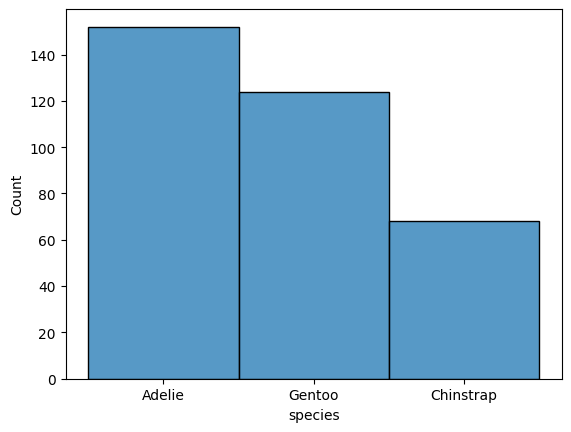

In [254]:
sns.histplot(df["species"], discrete=True)

<Axes: xlabel='sex', ylabel='Count'>

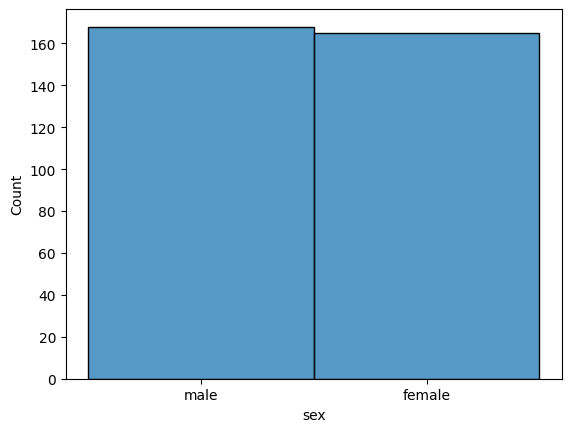

In [255]:
sns.histplot(df["sex"], discrete=True)

<Axes: xlabel='year', ylabel='Count'>

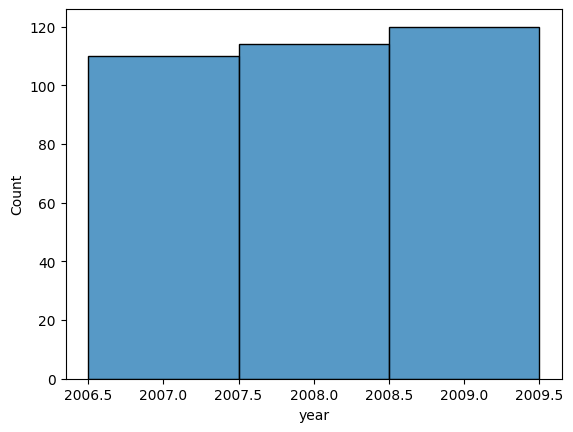

In [256]:
sns.histplot(df["year"], discrete=True)

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

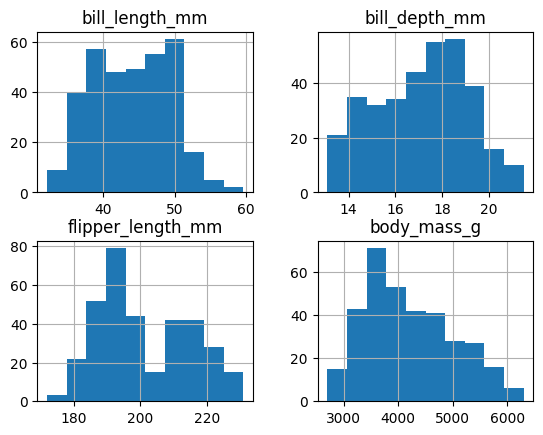

In [257]:
df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm","body_mass_g"]].hist()

<Axes: ylabel='bill_depth_mm'>

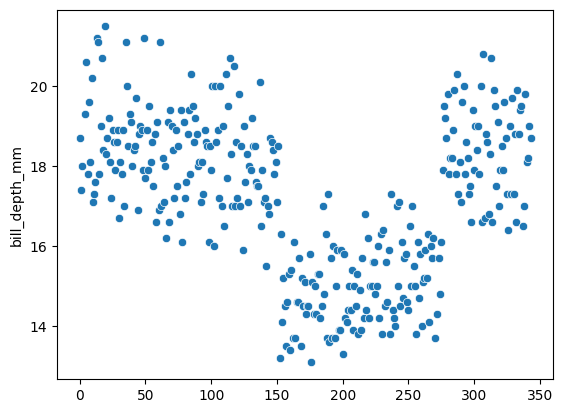

In [258]:
sns.scatterplot(df["bill_depth_mm"])

<Axes: ylabel='bill_length_mm'>

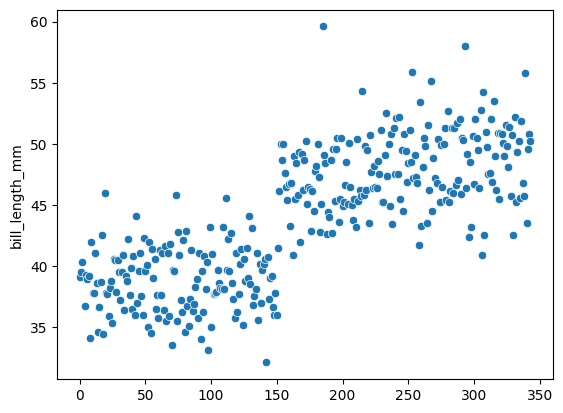

In [259]:
sns.scatterplot(df["bill_length_mm"])

<Axes: ylabel='flipper_length_mm'>

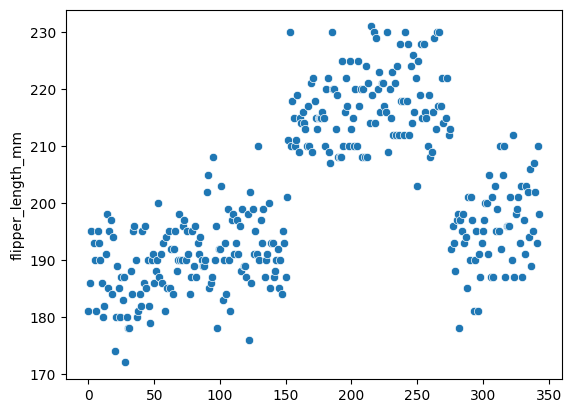

In [260]:
sns.scatterplot(df["flipper_length_mm"])

<Axes: ylabel='body_mass_g'>

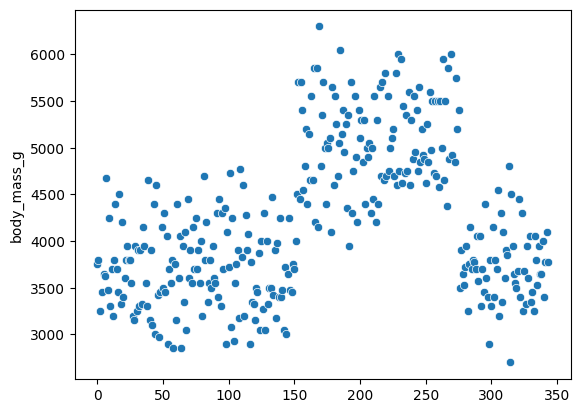

In [261]:
sns.scatterplot(df["body_mass_g"])

## Tratamiento de datos

In [262]:
df["bill_length_mm"].fillna(value=df["bill_length_mm"].mean(), inplace=True)
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.50000,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.30000,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,43.92193,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.70000,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.80000,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.50000,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.60000,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.80000,19.0,210.0,4100.0,male,2009


In [263]:
df["bill_depth_mm"].fillna(value=df["bill_depth_mm"].mean(), inplace=True)
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.80000,19.80000,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.50000,18.10000,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.60000,18.20000,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.80000,19.00000,210.0,4100.0,male,2009


In [264]:
df["flipper_length_mm"].fillna(value=df["flipper_length_mm"].mean(), inplace=True)
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.0,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.0,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.0,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,NaN,NaN,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.0,male,2009
340,341,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.0,female,2009
341,342,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.0,male,2009
342,343,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.0,male,2009


In [265]:
df["body_mass_g"].fillna(value=df["body_mass_g"].mean(), inplace=True)
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,341,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,342,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,343,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male,2009


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [267]:
df.ffill(inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                344 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [269]:
df.drop(["rowid"], inplace=True, axis=1)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [271]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

## División de datos

In [272]:
X = df[['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y = df[["species"]]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

## Escalado

especies: mapeo

sex: ohe

island: label encoder

medidas: min/max escaler


### Especies

In [274]:
y_train_map = y_train.copy()
y_train_map = y_train_map.replace({"Adelie":0, "Gentoo":1, "Chinstrap":2})

In [277]:
y_test_map = y_test.copy()
y_test_map = y_test_map.replace({"Adelie":0, "Gentoo":1, "Chinstrap":2})


### Sexo

In [278]:
def apply_onehot_encoder(train:pd.DataFrame, columns_to_encode:list, test:pd.DataFrame=None):
    
    # Resetear índices para evitar desalineación
    train = train.reset_index(drop=True)
    
    # Crear el OneHotEncoder
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

    # Ajustar y transformar las columnas seleccionadas
    transformed_data = encoder.fit_transform(train[columns_to_encode])

    # Crear un DataFrame con las columnas transformadas
    transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(columns_to_encode))
    
    # Concatenar con el DataFrame original excluyendo las columnas transformadas
    df_concatenated = pd.concat([train.drop(columns_to_encode, axis=1), transformed_df], axis=1)

    # Si se proporciona un segundo DataFrame, aplicar la misma transformación
    if test is not None:
        transformed_data_to_transform = encoder.transform(test[columns_to_encode])
        transformed_df_to_transform = pd.DataFrame(transformed_data_to_transform, columns=encoder.get_feature_names_out(columns_to_encode))
        df_to_transform_concatenated = pd.concat([test.drop(columns_to_encode, axis=1), transformed_df_to_transform], axis=1)
        return df_concatenated, df_to_transform_concatenated

    return df_concatenated

In [279]:
X_train_ohe = apply_onehot_encoder(X_train, ["sex"])
X_train_ohe

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Biscoe,39.7,17.7,193.0,3200.0,2009,1.0,0.0
1,Biscoe,43.8,13.9,208.0,4300.0,2008,1.0,0.0
2,Biscoe,41.7,14.7,210.0,4700.0,2009,1.0,0.0
3,Biscoe,45.5,14.5,212.0,4750.0,2009,1.0,0.0
4,Biscoe,46.1,15.1,215.0,5100.0,2007,0.0,1.0
...,...,...,...,...,...,...,...,...
270,Biscoe,45.2,15.8,215.0,5300.0,2008,0.0,1.0
271,Dream,39.2,18.6,190.0,4250.0,2009,0.0,1.0
272,Biscoe,35.5,16.2,195.0,3350.0,2008,1.0,0.0
273,Biscoe,45.8,14.2,219.0,4700.0,2008,1.0,0.0


In [280]:
X_test_ohe = apply_onehot_encoder(X_test, ["sex"])
X_test_ohe

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Torgersen,36.7,19.3,193.0,3450.0,2007,1.0,0.0
1,Biscoe,50.5,15.2,216.0,5000.0,2009,1.0,0.0
2,Biscoe,36.4,17.1,184.0,2850.0,2008,1.0,0.0
3,Dream,50.0,19.5,196.0,3900.0,2007,0.0,1.0
4,Biscoe,51.5,16.3,230.0,5500.0,2009,0.0,1.0
...,...,...,...,...,...,...,...,...
64,Torgersen,40.2,17.0,176.0,3450.0,2009,1.0,0.0
65,Dream,51.3,19.2,193.0,3650.0,2007,0.0,1.0
66,Dream,42.5,16.7,187.0,3350.0,2008,1.0,0.0
67,Biscoe,45.5,15.0,220.0,5000.0,2008,0.0,1.0


### Isla

In [281]:
le = LabelEncoder()

In [282]:
X_train_lab = X_train_ohe.copy()

In [283]:
X_train_lab["island"] = le.fit_transform(X_train_lab["island"])
X_train_lab

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,0,39.7,17.7,193.0,3200.0,2009,1.0,0.0
1,0,43.8,13.9,208.0,4300.0,2008,1.0,0.0
2,0,41.7,14.7,210.0,4700.0,2009,1.0,0.0
3,0,45.5,14.5,212.0,4750.0,2009,1.0,0.0
4,0,46.1,15.1,215.0,5100.0,2007,0.0,1.0
...,...,...,...,...,...,...,...,...
270,0,45.2,15.8,215.0,5300.0,2008,0.0,1.0
271,1,39.2,18.6,190.0,4250.0,2009,0.0,1.0
272,0,35.5,16.2,195.0,3350.0,2008,1.0,0.0
273,0,45.8,14.2,219.0,4700.0,2008,1.0,0.0


In [284]:
X_test_lab = X_test_ohe.copy()
X_test_lab["island"] = le.fit_transform(X_test_lab["island"])
X_test_lab

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,2,36.7,19.3,193.0,3450.0,2007,1.0,0.0
1,0,50.5,15.2,216.0,5000.0,2009,1.0,0.0
2,0,36.4,17.1,184.0,2850.0,2008,1.0,0.0
3,1,50.0,19.5,196.0,3900.0,2007,0.0,1.0
4,0,51.5,16.3,230.0,5500.0,2009,0.0,1.0
...,...,...,...,...,...,...,...,...
64,2,40.2,17.0,176.0,3450.0,2009,1.0,0.0
65,1,51.3,19.2,193.0,3650.0,2007,0.0,1.0
66,1,42.5,16.7,187.0,3350.0,2008,1.0,0.0
67,0,45.5,15.0,220.0,5000.0,2008,0.0,1.0


### Medidas

In [285]:
scaler = MinMaxScaler()

In [286]:
X_train_lab.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'year', 'sex_female', 'sex_male'],
      dtype='object')

In [287]:
X_train_esc = X_train_lab.copy()
X_train_esc[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 
             'body_mass_g']] = scaler.fit_transform(X_train_esc[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
X_train_esc

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,0,0.276364,0.547619,0.362069,0.138889,2009,1.0,0.0
1,0,0.425455,0.095238,0.620690,0.444444,2008,1.0,0.0
2,0,0.349091,0.190476,0.655172,0.555556,2009,1.0,0.0
3,0,0.487273,0.166667,0.689655,0.569444,2009,1.0,0.0
4,0,0.509091,0.238095,0.741379,0.666667,2007,0.0,1.0
...,...,...,...,...,...,...,...,...
270,0,0.476364,0.321429,0.741379,0.722222,2008,0.0,1.0
271,1,0.258182,0.654762,0.310345,0.430556,2009,0.0,1.0
272,0,0.123636,0.369048,0.396552,0.180556,2008,1.0,0.0
273,0,0.498182,0.130952,0.810345,0.555556,2008,1.0,0.0


In [288]:
X_test_esc = X_test_lab.copy()
X_test_esc[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 
             'body_mass_g']] = scaler.fit_transform(X_test_esc[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
X_test_esc

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,2,0.153846,0.769231,0.309091,0.200000,2007,1.0,0.0
1,0,0.817308,0.243590,0.727273,0.716667,2009,1.0,0.0
2,0,0.139423,0.487179,0.145455,0.000000,2008,1.0,0.0
3,1,0.793269,0.794872,0.363636,0.350000,2007,0.0,1.0
4,0,0.865385,0.384615,0.981818,0.883333,2009,0.0,1.0
...,...,...,...,...,...,...,...,...
64,2,0.322115,0.474359,0.000000,0.200000,2009,1.0,0.0
65,1,0.855769,0.756410,0.309091,0.266667,2007,0.0,1.0
66,1,0.432692,0.435897,0.200000,0.166667,2008,1.0,0.0
67,0,0.576923,0.217949,0.800000,0.716667,2008,0.0,1.0


## BaseLines y selección de modelo

In [312]:
lr = LogisticRegression()
accuracy_score = cross_val_score(lr, X_train_esc, y_train_map, scoring="accuracy", cv=2)
precision_score = cross_val_score(lr, X_train_esc, y_train_map, scoring="precision", cv=2)
f1_macro = cross_val_score(lr, X_train_esc, y_train_map, scoring="f1_macro", cv=2)

print(
    f" accuracy_score = {accuracy_score}" 
    #f"\n precision_score = {precision_score}"
    f"\n f1_score = {f1_macro}"
)

 accuracy_score = [0.96376812 0.91970803]
 f1_score = [0.95200768 0.88340861]


## Entrenamiento

In [313]:
log_reg = LogisticRegression()
log_reg.fit(X_train_esc, y_train_map)


## Predicción

In [319]:
y_pred = log_reg.predict(X_test_esc)

## Validación

In [320]:
print(classification_report(y_test_map, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      1.00      1.00        27
           2       1.00      0.76      0.87        17

    accuracy                           0.94        69
   macro avg       0.95      0.92      0.93        69
weighted avg       0.95      0.94      0.94        69



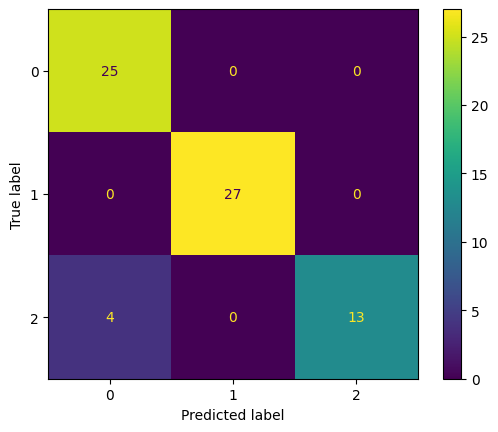

In [325]:
ConfusionMatrixDisplay(confusion_matrix(y_test_map, y_pred)).plot()

In [326]:
multilabel_confusion_matrix(y_test_map, y_pred)

array([[[40,  4],
        [ 0, 25]],

       [[42,  0],
        [ 0, 27]],

       [[52,  0],
        [ 4, 13]]], dtype=int64)